In [2]:
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
import time

In [3]:
def fibonacci(f, eps, l, r):
    if (r - l < eps):
        return (l + r) / 2
    fib = list([0, 1])
    n = 0
    while (True):
        fibi = fib[n] + fib[n + 1]
        fib.append(fibi)
        if (fibi * eps > r - l):
            break
        n += 1
    s, t = False, False
    fx1, fx2 = 0, 0
    while (n > 0):
        x1 = l + fib[n] / fib[n + 2] * (r - l)
        x2 = l + fib[n + 1] / fib[n + 2] * (r - l)
        if (not s):
            fx1 = f(x1)
        if (not t):
            fx2 = f(x2)
        if (fx1 > fx2):
            l = x1
            s = True
            t = False
            fx1 = fx2
        else:
            r = x2
            s = False
            t = True
            fx2 = fx1
        n -= 1
    return (l + r) / 2

In [4]:
def gradient_descent(f, g, x0, eps, alpha, step_search):
    alpha0 = alpha
    x = x0
    data = list([])
    data.append([x[i] if (i < x.shape[0]) else f(x) for i in range(x.shape[0] + 1)])
    while (True):
        grad = g(x)
        x_new = np.copy(x)
        def gg(y):
            return f(x - y * grad)
        x_new -= step_search(gg, eps, 0, alpha) * grad
        if (np.linalg.norm(x_new - x) < eps):
            break
        x = x_new
        data.append([x[i] if (i < x.shape[0]) else f(x) for i in range(x.shape[0] + 1)])
    return x, np.array(data)

In [5]:
def conjugated_gradients(f, grad, x0, eps, alpha, step_search):
    x = x0
    n = x.shape[0]
    s = np.zeros(n)
    delta_prev = np.ones(n)
    data = list([])
    data.append([x[i] if (i < x.shape[0]) else f(x) for i in range(x.shape[0] + 1)])
    while (True):
        delta = -grad(x)
        beta = delta.dot(delta) / delta_prev.dot(delta_prev)
        delta_prev = np.copy(delta)
        s = delta + beta * s
        def g(y):
            return f(x + y * s) 
        a = step_search(g, eps, 0, alpha)
        x_new = x + a * s
        if (np.linalg.norm(x_new - x) < eps):
            return x, np.array(data)
        data.append([x_new[i] if (i < x.shape[0]) else f(x_new) for i in range(x.shape[0] + 1)])
        x = x_new

In [6]:
def newton(f, grad, hessian, x0, eps, alpha, step_search):
    x = x0
    data = list([])
    data.append([x[i] if (i < x.shape[0]) else f(x) for i in range(x.shape[0] + 1)])
    while (True):
        delta = -np.linalg.inv(hessian(x)).dot(grad(x))
        def g(y):
            return f(x + y * delta)
        a = step_search(g, eps, 0, alpha)
        x_new = x + a * delta
        if (np.linalg.norm(x_new - x) < eps):
            return x, np.array(data)
        data.append([x_new[i] if (i < x.shape[0]) else f(x_new) for i in range(x.shape[0] + 1)])
        x = x_new

In [121]:
counter = 0
class Number(object):
    def __init__(self, x):
        self.x = x
        
    def __add__(self, other):
        if (isinstance(other, Number)):
            return self.x + other
        global counter
        counter += 1
        return Number(self.x + other)
    
    def __radd__(self, other):
        global counter
        counter += 1
        return Number(self.x + other)
    
    def __mul__(self, other):
        if (isinstance(other, Number)):
            return self.x * other
        global counter
        counter += 1
        return Number(self.x * other)
    
    def __rmul__(self, other):
        global counter
        counter += 1
        return Number(self.x * other)
    
    def __sub__(self, other):
        if (isinstance(other, Number)):
            return self.x - other
        global counter
        counter += 1
        return Number(self.x - other)
    
    def __rsub__(self, other):
        global counter
        counter += 1
        return Number(self.x - other)
    
    def __truediv__(self, other):
        if (isinstance(other, Number)):
            return self.x / other
        global counter
        counter += 1
        return Number(self.x / other)
    
    def __rtruediv__(self, other):
        global counter
        counter += 1
        return Number(self.x / other)
    
    def __pow__(self, other):
        global counter
        counter += 1
        return Number(self.x ** other)
    
    def __gt__(self, other):
        if (isinstance(other, Number)):
            return self.x > other.x
        else:
            return self.x > other
        
    def __lt__(self, other):
        if (isinstance(other, Number)):
            return self.x < other.x
        else:
            return self.x < other    
        
    def sqrt(self):
        global counter
        counter += 1
        return Number(np.sqrt(self.x))

In [124]:
def f(x):
    return 100 * (x[1] - x[0]) ** 2 + (1 - x[0]) ** 2

def grad(x):
    return np.array([200 * (x[1] - x[0]) * -1 + 2 * (1 - x[0]) * -1, 200 * (x[1] - x[0])])

def hessian(x):
    return np.array([[202, -200],
                     [-200, 200]])

#x0 = np.array([Number(100), Number(100)], dtype=object)
x0 = np.array([100, 100], dtype=float)

x, data = gradient_descent(f, grad, x0, 1e-6, 1, fibonacci)
print("GRADIENT DESCENT")
print(x, f(x))
print("Iterations:", data.shape[0] - 1)
start = time.time()
mem_usage = memory_usage((gradient_descent, (f, grad, x0, 1e-6, 1, fibonacci)))
end = time.time()
print("RAM:", max(mem_usage))
#print("Operations:", counter)
print("Time:", end - start)
counter = 0

x, data = conjugated_gradients(f, grad, x0, 1e-6, 1, fibonacci)
print("CONJUGATED GRADIENTS")
print(x, f(x))
print("Iterations:", data.shape[0] - 1)
start = time.time()
mem_usage = memory_usage((conjugated_gradients, (f, grad, x0, 1e-6, 1, fibonacci)))
end = time.time()
print("RAM:", max(mem_usage))
#print("Operations:", counter)
print("Time:", end - start)
counter = 0

x, data = newton(f, grad, hessian, x0, 1e-6, 1, fibonacci)
print("NEWTON")
print(x, f(x))
print("Iterations:", data.shape[0] - 1)
start = time.time()
mem_usage = memory_usage((newton, (f, grad, hessian, x0, 1e-6, 1, fibonacci)))
end = time.time()
print("RAM:", max(mem_usage))
#print("Operations:", counter)
print("Time:", end - start)
counter = 0

GRADIENT DESCENT
[1.00010132 1.00010131] 1.0265750309213022e-08
Iterations: 2772
RAM: 3138.3203125
Time: 0.8812830448150635
CONJUGATED GRADIENTS
[1.00000062 1.00000013] 2.4147944003257386e-11
Iterations: 4
RAM: 3138.3203125
Time: 0.4492056369781494
NEWTON
[1. 1.] 1.5104552220947316e-20
Iterations: 2
RAM: 3138.3203125
Time: 0.4210190773010254


In [125]:
def f(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2

def grad(x):
    return np.array([200 * (x[1] - x[0] ** 2) * -2 * x[0] + 2 * (1 - x[0]) * -1, 200 * (x[1] - x[0] ** 2)])

def hessian(x):
    return np.array([[-400 * (x[1] - x[0] ** 2) - 400 * x[0] * -2 * x[0] + 2, -400 * x[0]],
                     [-400 * x[0], 200]])

#x0 = np.array([Number(100), Number(100)], dtype=object)
x0 = np.array([100, 100], dtype=float)

#x, data = gradient_descent(f, grad, x0, 1e-6, 1, fibonacci)
#print("GRADIENT DESCENT")
#print(x, f(x))
#print("Iterations:", data.shape[0] - 1)
#start = time.time()
#mem_usage = memory_usage((gradient_descent, (f, grad, x0, 1e-6, 1, fibonacci)))
#end = time.time()
#print("RAM:", max(mem_usage))
##print("Operations:", counter)
#print("Time:", end - start)
#counter = 0

#x, data = conjugated_gradients(f, grad, x0, 1e-6, 1, fibonacci)
#print("CONJUGATED GRADIENTS")
#print(x, f(x))
#print("Iterations:", data.shape[0] - 1)
#start = time.time()
#mem_usage = memory_usage((conjugated_gradients, (f, grad, x0, 1e-6, 1, fibonacci)))
#end = time.time()
#print("RAM:", max(mem_usage))
##print("Operations:", counter)
#print("Time:", end - start)
#counter = 0

x, data = newton(f, grad, hessian, x0, 1e-6, 1, fibonacci)
print("NEWTON")
print(x, f(x))
print("Iterations:", data.shape[0] - 1)
start = time.time()
mem_usage = memory_usage((newton, (f, grad, hessian, x0, 1e-6, 1, fibonacci)))
end = time.time()
print("RAM:", max(mem_usage))
#print("Operations:", counter)
print("Time:", end - start)
counter = 0

NEWTON
[1.00000001 1.00000002] 8.131491211665234e-17
Iterations: 213
RAM: 3138.3203125
Time: 0.33011555671691895


In [126]:
def fst(x):
    return 2 * np.exp(-(((x[0] - 1) / 2) ** 2) - (((x[1] - 1) / 1) ** 2))

def snd(x):
    return 3 * np.exp(-(((x[0] - 2) / 3) ** 2) - (((x[1] - 3) / 2) ** 2))

def f(x):
    return fst(x) + snd(x)

def grad(x):
    return np.array([fst(x) * -2 * ((x[0] - 1) / 2) / 2 + snd(x) * -2 * ((x[0] - 2) / 3) / 3,
                     fst(x) * -2 * ((x[1] - 1) / 1) + snd(x) * -2 * ((x[1] - 3) / 2) / 2])

def hessian(x):
    return np.array([
        [
            fst(x) * (-2 * ((x[0] - 1) / 2) / 2) ** 2 - fst(x) / 2 + snd(x) * (-2 * ((x[0] - 2) / 3) / 3) ** 2 - 2 * snd(x) / 9,
            fst(x) * -2 * ((x[0] - 1) / 2) / 2 * -2 * ((x[1] - 1) / 1) + snd(x) * -2 * ((x[0] - 2) / 3) / 3 * -2 * ((x[1] - 3) / 2) / 2
        ],
        [
            fst(x) * -2 * ((x[0] - 1) / 2) / 2 * -2 * ((x[1] - 1) / 1) + snd(x) * -2 * ((x[0] - 2) / 3) / 3 * -2 * ((x[1] - 3) / 2) / 2,
            fst(x) * (-2 * ((x[1] - 1) / 1)) ** 2 - 2 * fst(x) + snd(x) * (-2 * ((x[1] - 3) / 2) / 2) ** 2 - snd(x) / 2
        ]])

def ff(x):
    return -f(x)

def gg(x):
    return -grad(x)

def hh(x):
    return -hessian(x)

#x0 = np.array([Number(100), Number(100)], dtype=object)
x0 = [
    np.array([2, 2], dtype=float),
    np.array([1, 1], dtype=float),
    np.array([2, 3], dtype=float),
    np.array([1, 3], dtype=float),
    np.array([1, 2], dtype=float),
]

for i in range(5):
    print("x0:", x0[i])
    x, data = gradient_descent(ff, gg, x0[i], 1e-6, 1, fibonacci)
    print("GRADIENT DESCENT")
    print(x, f(x))
    print("Iterations:", data.shape[0] - 1)
    start = time.time()
    mem_usage = memory_usage((gradient_descent, (ff, gg, x0[i], 1e-6, 1, fibonacci)))
    end = time.time()
    print("RAM:", max(mem_usage))
    #print("Operations:", counter)
    print("Time:", end - start)
    counter = 0

    x, data = conjugated_gradients(ff, gg, x0[i], 1e-6, 1, fibonacci)
    print("CONJUGATED GRADIENTS")
    print(x, f(x))
    print("Iterations:", data.shape[0] - 1)
    start = time.time()
    mem_usage = memory_usage((conjugated_gradients, (ff, gg, x0[i], 1e-6, 1, fibonacci)))
    end = time.time()
    print("RAM:", max(mem_usage))
    #print("Operations:", counter)
    print("Time:", end - start)
    counter = 0

    x, data = newton(ff, gg, hh, x0[i], 1e-6, 1, fibonacci)
    print("NEWTON")
    print(x, f(x))
    print("Iterations:", data.shape[0] - 1)
    start = time.time()
    mem_usage = memory_usage((newton, (ff, gg, hh, x0[i], 1e-6, 1, fibonacci)))
    end = time.time()
    print("RAM:", max(mem_usage))
    #print("Operations:", counter)
    print("Time:", end - start)
    counter = 0
    
    print()

x0: [2. 2.]
GRADIENT DESCENT
[1.2630354  1.33439635] 3.169317216224873
Iterations: 17
RAM: 3138.3203125
Time: 0.21746611595153809
CONJUGATED GRADIENTS
[1.26303308 1.33439703] 3.169317216220837
Iterations: 126
RAM: 3138.3203125
Time: 0.35225701332092285
NEWTON
[1.75206039 2.21335797] 2.9508424189044686
Iterations: 1
RAM: 3138.3203125
Time: 0.4491705894470215

x0: [1. 1.]
GRADIENT DESCENT
[1.26303432 1.33439501] 3.16931721622393
Iterations: 12
RAM: 3138.3203125
Time: 0.25359392166137695
CONJUGATED GRADIENTS
[1.26303493 1.33439595] 3.169317216225077
Iterations: 7
RAM: 3138.3203125
Time: 0.26020121574401855
NEWTON
[1.26303501 1.33439595] 3.169317216225082
Iterations: 4
RAM: 3138.3203125
Time: 0.24579858779907227

x0: [2. 3.]
GRADIENT DESCENT
[1.96715272 2.88611509] 3.035063527563021
Iterations: 10
RAM: 3138.3203125
Time: 0.25611042976379395
CONJUGATED GRADIENTS
[1.96715239 2.88611516] 3.035063527563242
Iterations: 7
RAM: 3138.3203125
Time: 0.25710201263427734
NEWTON
[1.96715144 2.88611475]

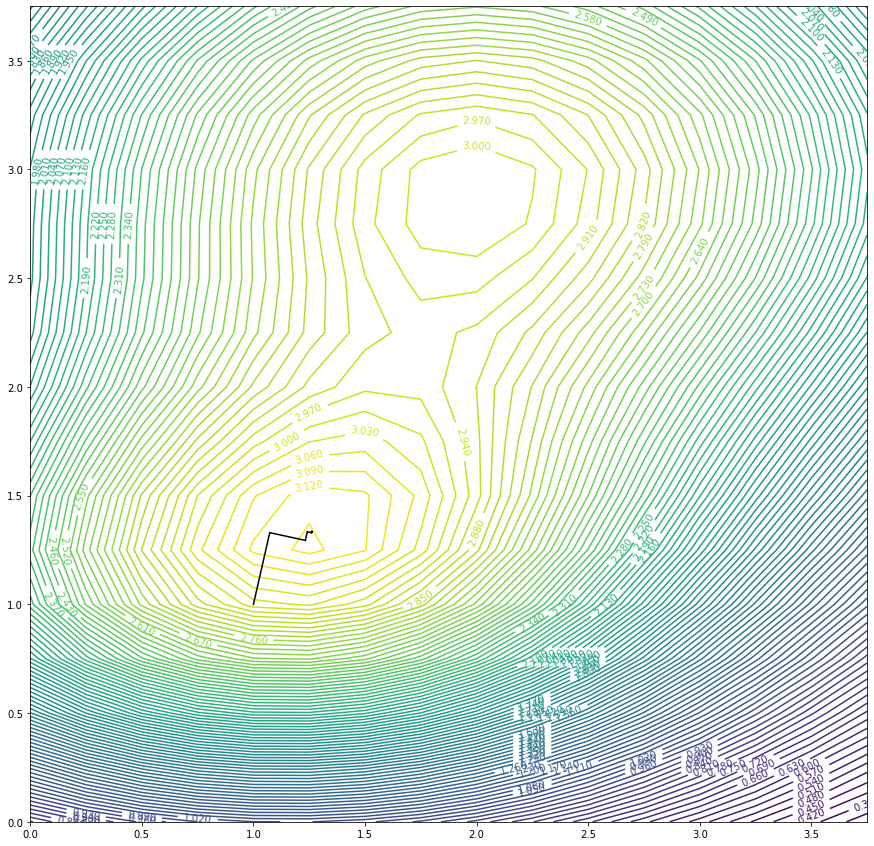

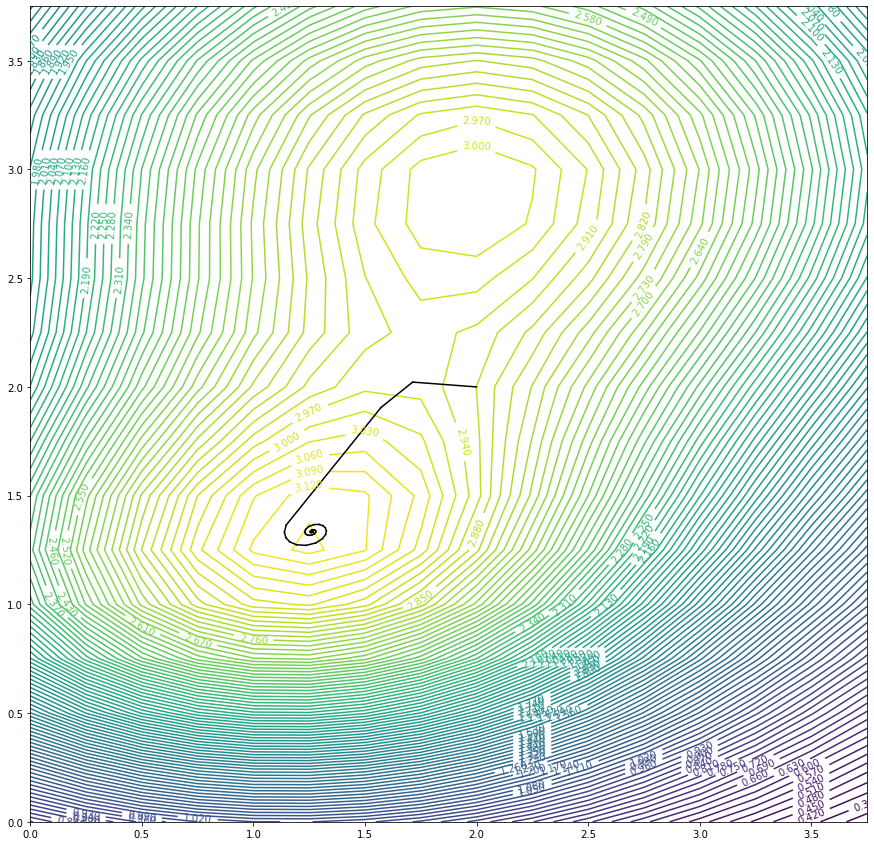

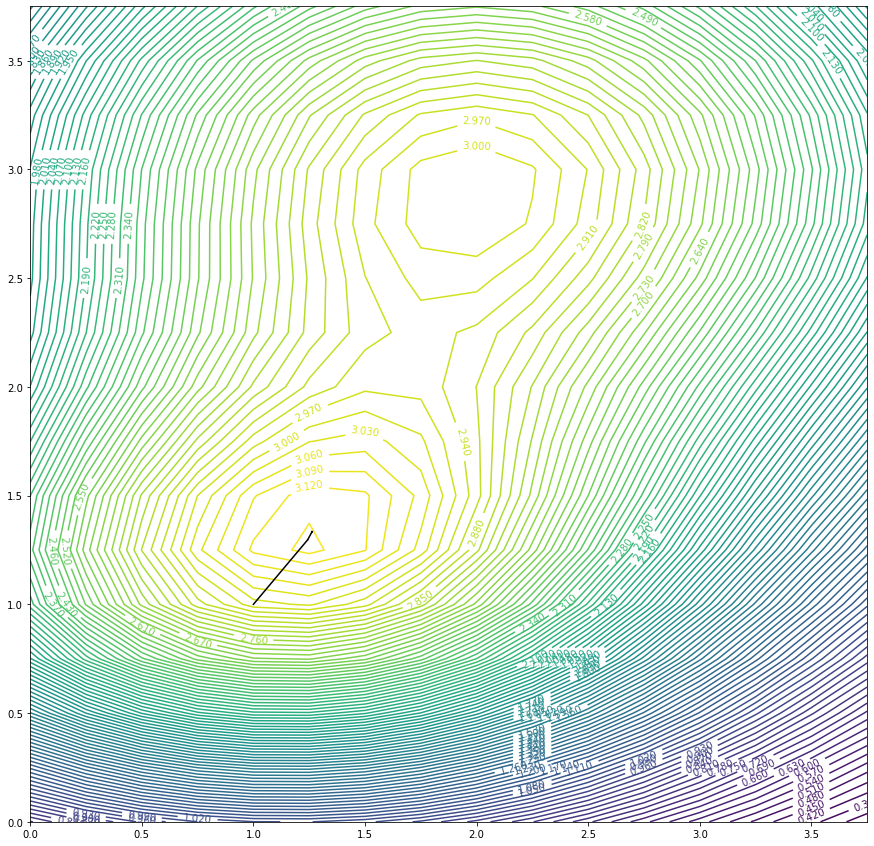

In [8]:
def fst(x):
    return 2 * np.exp(-(((x[0] - 1) / 2) ** 2) - (((x[1] - 1) / 1) ** 2))

def snd(x):
    return 3 * np.exp(-(((x[0] - 2) / 3) ** 2) - (((x[1] - 3) / 2) ** 2))

def f(x):
    return fst(x) + snd(x)

def grad(x):
    return np.array([fst(x) * -2 * ((x[0] - 1) / 2) / 2 + snd(x) * -2 * ((x[0] - 2) / 3) / 3,
                     fst(x) * -2 * ((x[1] - 1) / 1) + snd(x) * -2 * ((x[1] - 3) / 2) / 2])

def hessian(x):
    return np.array([
        [
            fst(x) * (-2 * ((x[0] - 1) / 2) / 2) ** 2 - fst(x) / 2 + snd(x) * (-2 * ((x[0] - 2) / 3) / 3) ** 2 - 2 * snd(x) / 9,
            fst(x) * -2 * ((x[0] - 1) / 2) / 2 * -2 * ((x[1] - 1) / 1) + snd(x) * -2 * ((x[0] - 2) / 3) / 3 * -2 * ((x[1] - 3) / 2) / 2
        ],
        [
            fst(x) * -2 * ((x[0] - 1) / 2) / 2 * -2 * ((x[1] - 1) / 1) + snd(x) * -2 * ((x[0] - 2) / 3) / 3 * -2 * ((x[1] - 3) / 2) / 2,
            fst(x) * (-2 * ((x[1] - 1) / 1)) ** 2 - 2 * fst(x) + snd(x) * (-2 * ((x[1] - 3) / 2) / 2) ** 2 - snd(x) / 2
        ]])

def ff(x):
    return -f(x)

def gg(x):
    return -grad(x)

def hh(x):
    return -hessian(x)

X = np.arange(0, 4, 0.25)
Y = np.arange(0, 4, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])
fig, ax = plt.subplots(figsize=(15,15))
CS = ax.contour(X, Y, Z, levels=100)
ax.clabel(CS, inline=True, fontsize=10)

x0 = np.array([2, 2], dtype=float)
x, data = gradient_descent(ff, gg, x0, 1e-6, 1, fibonacci)

for i in range(data.shape[0] - 1):
    plt.plot((data[i][0], data[i + 1][0]), (data[i][1], data[i + 1][1]), c='black')
plt.show()

X = np.arange(0, 4, 0.25)
Y = np.arange(0, 4, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])
fig, ax = plt.subplots(figsize=(15,15))
CS = ax.contour(X, Y, Z, levels=100)
ax.clabel(CS, inline=True, fontsize=10)

x0 = np.array([2, 2], dtype=float)
x, data = conjugated_gradients(ff, gg, x0, 1e-6, 1, fibonacci)

for i in range(data.shape[0] - 1):
    plt.plot((data[i][0], data[i + 1][0]), (data[i][1], data[i + 1][1]), c='black')
plt.show()

X = np.arange(0, 4, 0.25)
Y = np.arange(0, 4, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])
fig, ax = plt.subplots(figsize=(15,15))
CS = ax.contour(X, Y, Z, levels=100)
ax.clabel(CS, inline=True, fontsize=10)

x0 = np.array([1, 1], dtype=float)
x, data = newton(ff, gg, hh, x0, 1e-6, 1, fibonacci)

for i in range(data.shape[0] - 1):
    plt.plot((data[i][0], data[i + 1][0]), (data[i][1], data[i + 1][1]), c='black')
plt.show()